In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load da informations, create function that prints description.

data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

def print_description(col_name):
    print(data_info.loc[col_name]['Description'])
data_info.head

<bound method NDFrame.head of                                                             Description
LoanStatNew                                                            
loan_amnt             The listed amount of the loan applied for by t...
term                  The number of payments on the loan. Values are...
int_rate                                      Interest Rate on the loan
installment           The monthly payment owed by the borrower if th...
grade                                            LC assigned loan grade
sub_grade                                     LC assigned loan subgrade
emp_title             The job title supplied by the Borrower when ap...
emp_length            Employment length in years. Possible values ar...
home_ownership        The home ownership status provided by the borr...
annual_inc            The self-reported annual income provided by th...
verification_status   Indicates if income was verified by LC, not ve...
issue_d                           

In [3]:
#Load loan data and check basic info and head
df=pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head() # Categorical date :'term','grade','home_ownerschip','initial_list_status','pub_rec_bankruptcies'

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [5]:
print_description('pub_rec')

Number of derogatory public records


In [11]:
df.info() #containg nulls : 'emp_title','emp_lenght','title','revolt_util','mort_acc','pub_rec_bankruptcies'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

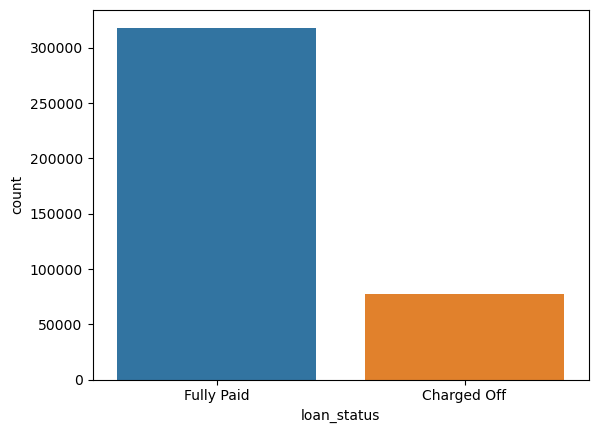

In [13]:
#loan_status (Fully paid or Charged Off)
sns.countplot(x = df['loan_status'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

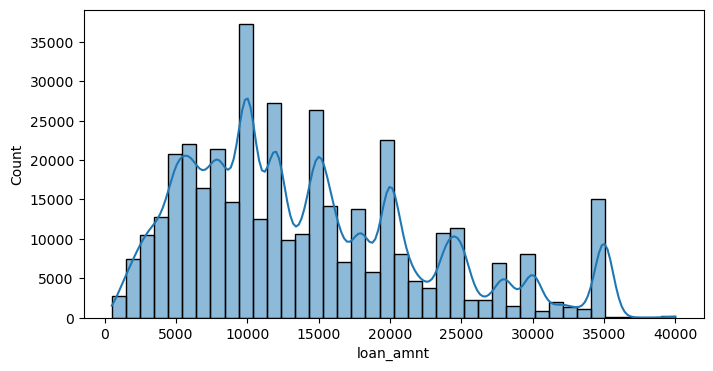

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(x = df['loan_amnt'],bins=40,kde=True)

<AxesSubplot:>

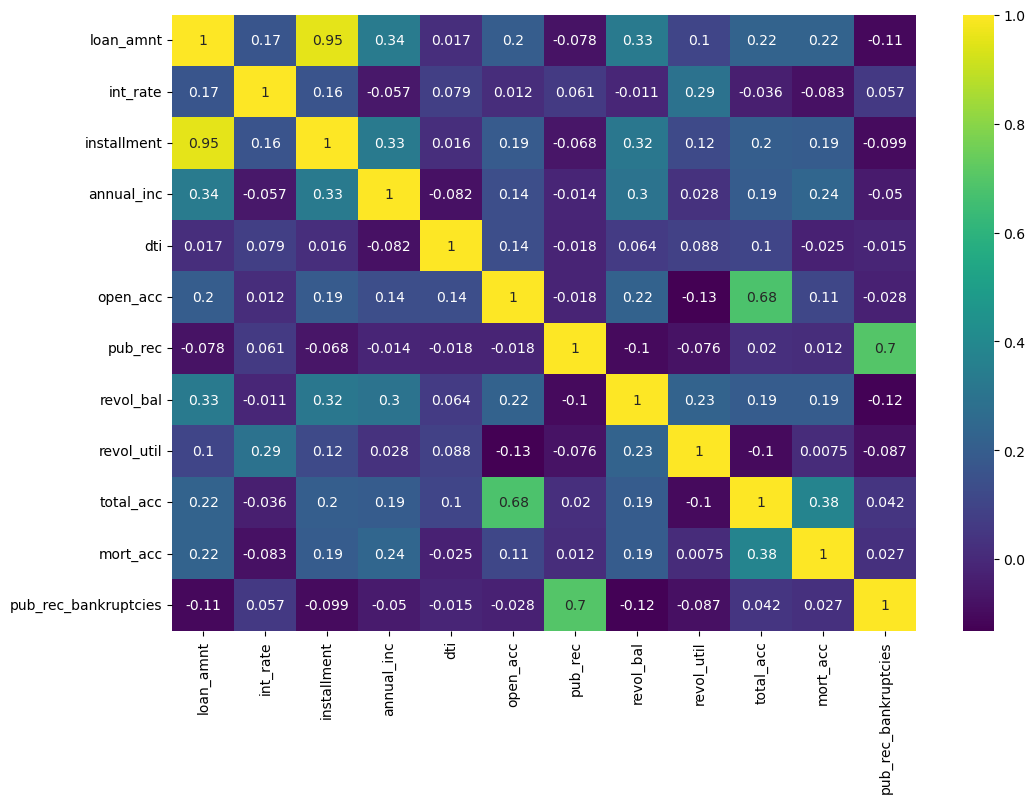

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True,)

<AxesSubplot:>

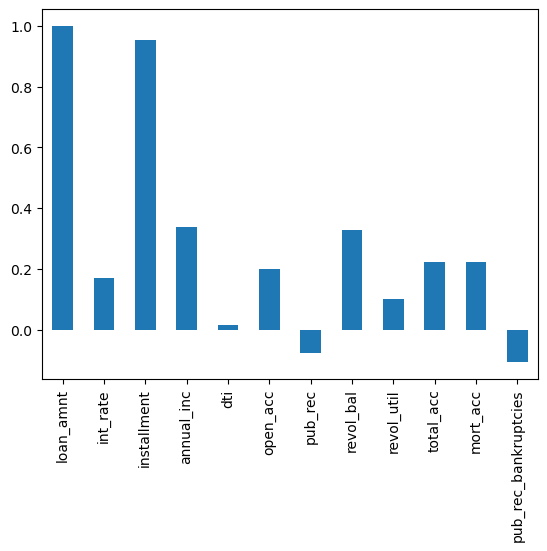

In [17]:
df.corr()['loan_amnt'].plot(kind='bar')

In [18]:
print_description('installment')

The monthly payment owed by the borrower if the loan originates.


In [19]:
print_description('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

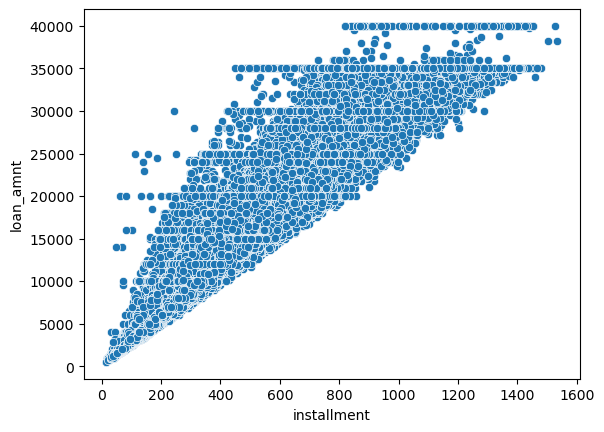

In [20]:
sns.scatterplot(y=df['loan_amnt'],x=df['installment'])

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

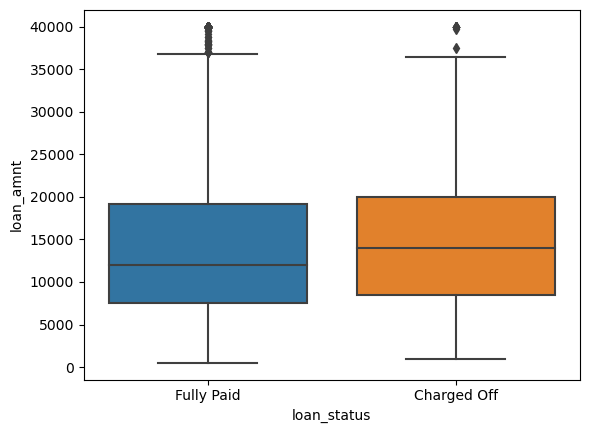

In [21]:
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'])

In [22]:
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [23]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

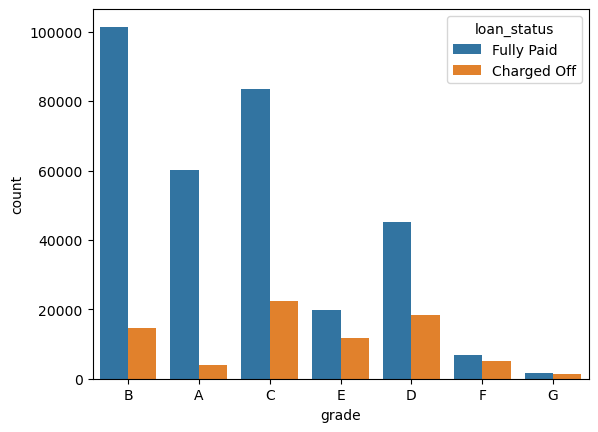

In [25]:
sns.countplot(x=df['grade'],hue=df['loan_status'])

In [26]:
sub_grade_sort = df.sort_values('sub_grade')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

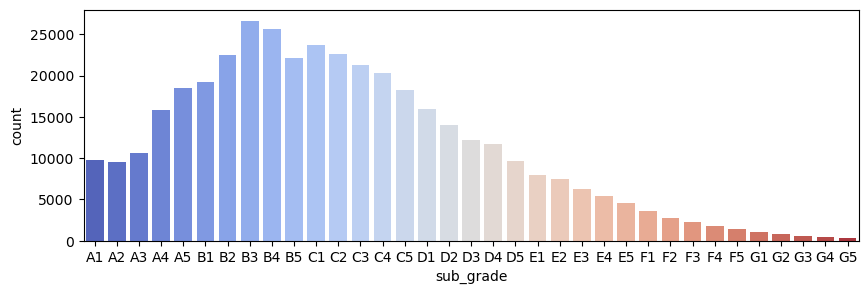

In [27]:
plt.figure(figsize=(10,3))
sns.countplot(x=sub_grade_sort['sub_grade'],palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

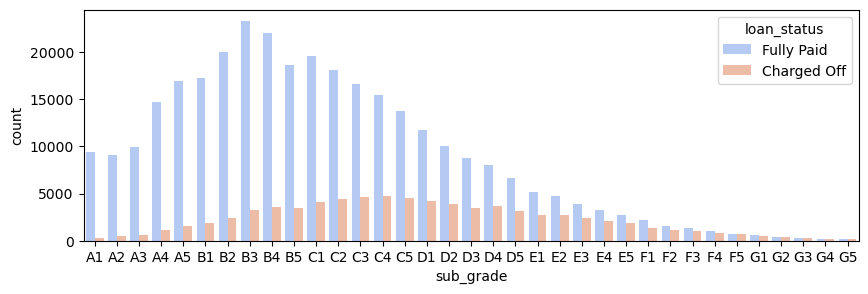

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(x=sub_grade_sort['sub_grade'],palette='coolwarm',hue = df['loan_status'])

In [29]:
not_paying = df.loc[df['grade'].isin(['F','G'])]

In [30]:
not_paying.sort_values('sub_grade',inplace=True)

C:\Users\cykad\anaconda3\envs\tf\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

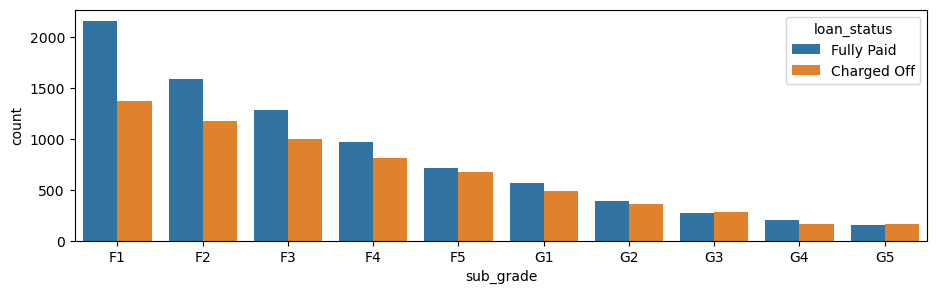

In [31]:
plt.figure(figsize=(11,3))
sns.countplot(x=not_paying['sub_grade'],hue=df['loan_status'])

In [33]:
def chech_if_paid(col_name):
    if col_name == 'Fully Paid':
        return 1
    else:
        return 0

In [34]:
df['loan_repaid']=df['loan_status'].apply(chech_if_paid)

In [35]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

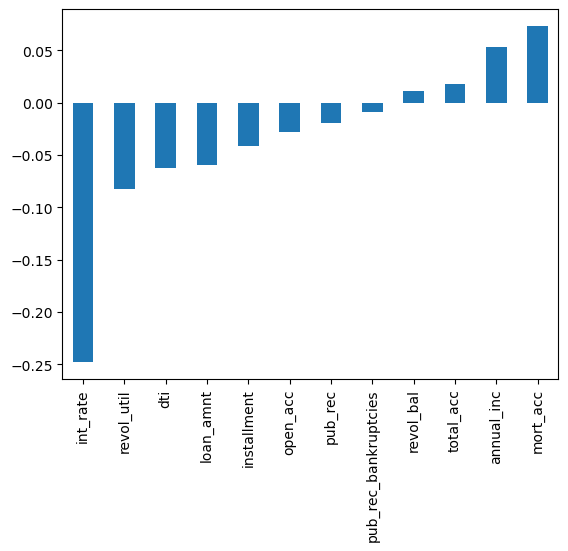

In [37]:
df.corr()[:-1]['loan_repaid'].sort_values().plot(kind='bar')

In [38]:
len(df)

396030

In [39]:
df.isnull().sum()/396030 *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [40]:
print_description('emp_title')
print_description('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [41]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [42]:
df.drop('emp_title',axis =1, inplace=True)

In [43]:
df['emp_length'].value_counts().sort_index()

1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: emp_length, dtype: int64

<AxesSubplot:>

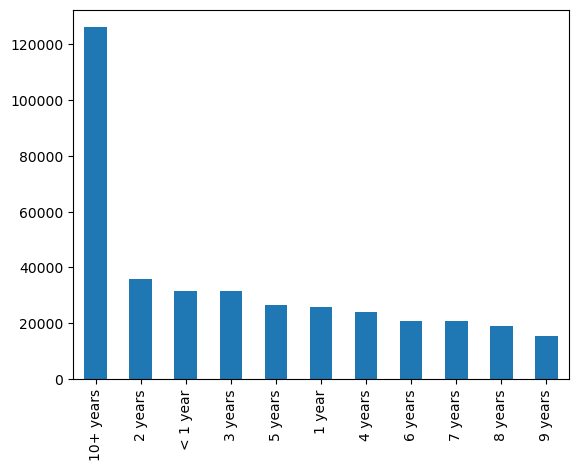

In [44]:
df['emp_length'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

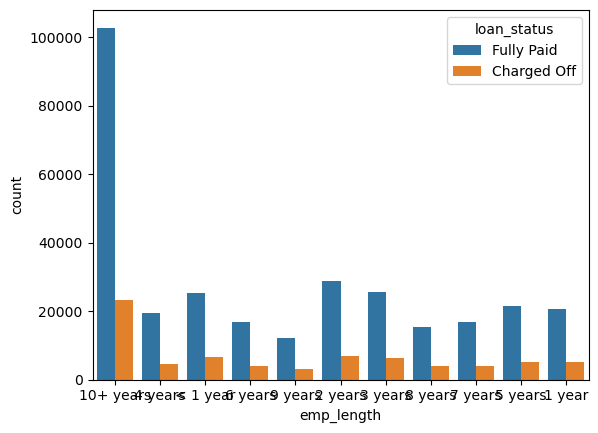

In [45]:
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

In [46]:
df['emp_length'].value_counts().sort_index()

1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: emp_length, dtype: int64

In [47]:
['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [48]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [49]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

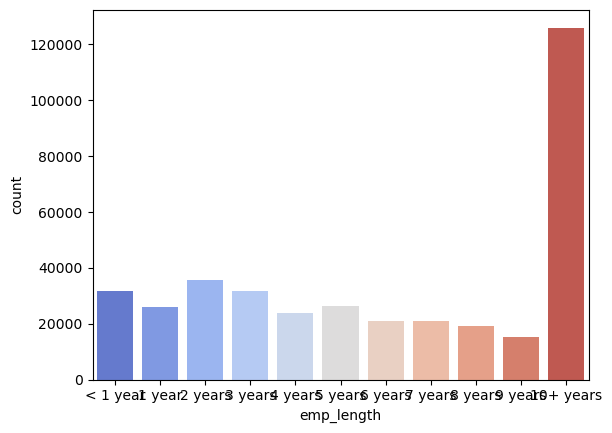

In [50]:
sns.countplot(x=df['emp_length'],order=emp_length_order,palette='coolwarm')

In [51]:
full_paid = df.groupby('emp_length').sum()['loan_repaid']

In [52]:
all_loans = df.groupby('emp_length').count()['loan_repaid']

In [53]:
no_paid = all_loans - full_paid

In [54]:
asd =no_paid / all_loans

<AxesSubplot:xlabel='emp_length'>

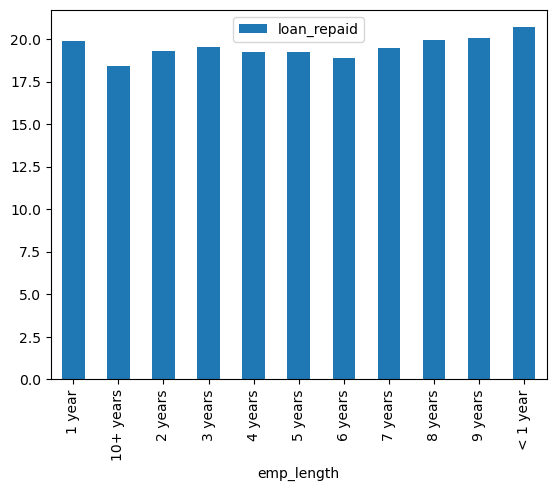

In [55]:
pd.DataFrame(asd*100).plot(kind='bar')

In [56]:
pd.DataFrame(asd*100).describe()

,loan_repaid
count,11.000000
mean,19.522328
std,0.615290
min,18.418610
25%,19.228599
50%,19.477400
75%,19.944728
max,20.687155


In [57]:
df.drop('emp_length',axis=1,inplace=True)

In [58]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [59]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [60]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [61]:
df.drop('title',axis=1,inplace = True)

In [62]:
print_description('mort_acc')

Number of mortgage accounts.


In [63]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [64]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:>

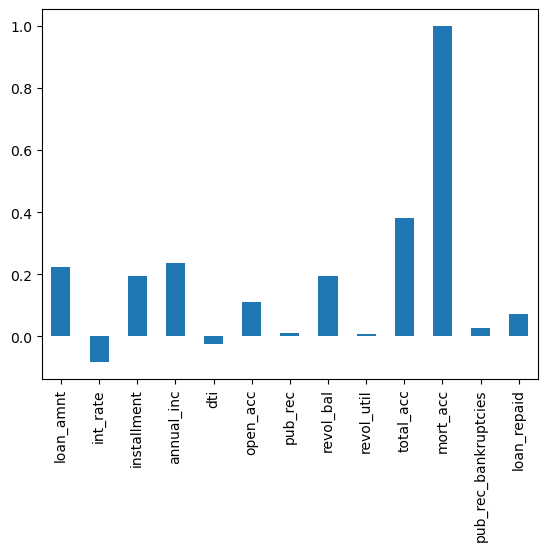

In [65]:
df.corr()['mort_acc'].plot(kind='bar')

In [66]:
total_avrg = df.groupby('total_acc').mean()['mort_acc']

In [67]:
df['mean']=df['total_acc'].map(total_avrg)

In [68]:
df[['mean','mort_acc']]

,mean,mort_acc
0,1.900506,0.0
1,2.103573,3.0
2,1.987414,0.0
3,0.722124,0.0
4,2.997056,1.0
...,...,...
396025,1.721794,0.0
396026,0.308422,1.0
396027,1.721794,0.0
396028,1.409380,5.0


In [69]:
def mean_values(col):
    mean = col[0]
    mort = col[1]
    if pd.isna(mort):
        return mean
    else:
        return mort
        

In [70]:
df['mort_acc'] = df[['mean','mort_acc']].apply(mean_values,axis=1)

In [71]:
df.drop('mean',axis = 1,inplace=True)

In [72]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [73]:
df['revol_util'].dropna(inplace=True)

In [74]:
df.dropna(inplace = True)

In [75]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [76]:
df[['term','grade','sub_grade','home_ownership','verification_status','issue_d','initial_list_status','application_type','address']]

,term,grade,sub_grade,home_ownership,verification_status,issue_d,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [77]:
mydict = {' 36 months':0,
         ' 60 months':1}

In [78]:
df['term_36_0_60_1'] = df['term'].map(mydict)

In [79]:
df['term'][0]

' 36 months'

In [80]:
df.groupby('term')['term_36_0_60_1'].count()

term
 36 months    301247
 60 months     93972
Name: term_36_0_60_1, dtype: int64

In [81]:
df.drop('grade',axis=1,inplace=True)

In [82]:
df.drop('term',axis=1,inplace=True)

In [83]:
dummy = pd.get_dummies(df['sub_grade'],drop_first=True)

In [84]:
dff = pd.concat([df,dummy],axis =1 )

In [85]:
df = dff.drop('sub_grade',axis = 1)

In [86]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'term_36_0_60_1',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [87]:
df['home_ownership']

0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
396029        RENT
Name: home_ownership, Length: 395219, dtype: object

In [88]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [89]:
def replace_with_other(col):
    if col not in['RENT', 'MORTGAGE', 'OWN', 'OTHER']:
        return 'OTHER'
    else:
        return col

In [90]:
df['home_ownership']=df['home_ownership'].apply(replace_with_other)

In [91]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [92]:
dff = pd.get_dummies(df['home_ownership'])

In [93]:
dff.drop('OTHER',axis=1,inplace=True)

In [94]:
df = pd.concat([dff,df],axis=1)

In [95]:
df.drop('home_ownership',axis=1)

,MORTGAGE,OWN,RENT,loan_amnt,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,1,10000.0,11.44,329.48,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,8000.0,11.99,265.68,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,15600.0,10.49,506.97,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,7200.0,6.49,220.65,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,24375.0,17.27,609.33,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,1,10000.0,10.99,217.38,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,1,0,0,21000.0,12.29,700.42,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,1,5000.0,9.99,161.32,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,1,0,0,21000.0,15.31,503.02,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.columns

Index(['MORTGAGE', 'OWN', 'RENT', 'loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'term_36_0_60_1',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [97]:
df['zip_code']=df['address'].apply(lambda x : x[-5:])

In [98]:
df.drop('address',axis=1,inplace=True)

In [99]:
df.head()

,MORTGAGE,OWN,RENT,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,zip_code
0,0,0,1,10000.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,...,0,0,0,0,0,0,0,0,0,22690
1,1,0,0,8000.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0,0,0,0,0,0,0,0,0,05113
2,0,0,1,15600.0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,...,0,0,0,0,0,0,0,0,0,05113
3,0,0,1,7200.0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,...,0,0,0,0,0,0,0,0,0,00813
4,1,0,0,24375.0,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,...,0,0,0,0,0,0,0,0,0,11650


In [100]:
df_zip_dummis = pd.get_dummies(df['zip_code'],drop_first=True)

In [101]:
df = pd.concat([df_zip_dummis,df],axis=1)

In [102]:
df.drop('issue_d',axis=1)

,05113,11650,22690,29597,30723,48052,70466,86630,93700,MORTGAGE,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,zip_code
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22690
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,05113
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,05113
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,00813
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30723
396026,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,05113
396027,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,70466
396028,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,29597


In [103]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

In [104]:
df.columns

Index(['05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'MORTGAGE', 'OWN', 'RENT', 'loan_amnt', 'int_rate',
       'installment', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'term_36_0_60_1', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'zip_code',
       'earliest_cr_year'],
      dtype='object')

In [105]:
df.drop(['zip_code','earliest_cr_line','loan_status'],axis=1,inplace=True)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X=df.drop('loan_repaid',axis=1).values

In [108]:
y=df['loan_repaid'].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [110]:
X_train.shape

(316175, 66)

In [111]:
X_test.shape

(79044, 66)

In [112]:
df.drop('home_ownership',axis=1,inplace=True)

In [113]:
df.columns

Index(['05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'MORTGAGE', 'OWN', 'RENT', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'term_36_0_60_1', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'earliest_cr_year'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   05113                 395219 non-null  uint8  
 1   11650                 395219 non-null  uint8  
 2   22690                 395219 non-null  uint8  
 3   29597                 395219 non-null  uint8  
 4   30723                 395219 non-null  uint8  
 5   48052                 395219 non-null  uint8  
 6   70466                 395219 non-null  uint8  
 7   86630                 395219 non-null  uint8  
 8   93700                 395219 non-null  uint8  
 9   MORTGAGE              395219 non-null  uint8  
 10  OWN                   395219 non-null  uint8  
 11  RENT                  395219 non-null  uint8  
 12  loan_amnt             395219 non-null  float64
 13  int_rate              395219 non-null  float64
 14  installment           395219 non-null  float64
 15  

In [115]:
dff=pd.get_dummies(df['verification_status'])

In [116]:
dff2=pd.get_dummies(df['purpose'])

In [117]:
dff3=pd.get_dummies(df['initial_list_status'])

In [118]:
dff4=pd.get_dummies(df['application_type'])

In [119]:
df['earliest_cr_year']=df['earliest_cr_year'].astype(int)

In [120]:
df = pd.concat([df,dff,dff2,dff3,dff4],axis=1)

In [121]:
df.drop(['verification_status','issue_d','purpose','initial_list_status','application_type'],axis=1,inplace = True)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X=df.drop('loan_repaid',axis=1).values

In [124]:
y=df['loan_repaid'].values

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler = MinMaxScaler()

In [128]:
scaler.fit(X_train)

MinMaxScaler()

In [129]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [148]:
from tensorflow.keras.layers import BatchNormalization

In [131]:
early_stoping = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=5)

In [132]:
#model.add(Dense(units=109,activation='selu',kernel_initializer='lecun_normal'))
#model.add(Dropout(rate=0.2))

In [169]:
model = Sequential()

In [170]:
model.add(Dense(units=79,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(units=59,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid'))

optimizer = tf.optimizers.Adam(lr=1e-3)
model.compile(loss='binary_crossentropy',optimizer=optimizer)

In [171]:
model.fit(x=X_train,
         y=y_train,
         epochs = 25,
         validation_data = (X_test,y_test),
         verbose=1,
         callbacks=early_stoping,
         batch_size = 265
         )

Epoch 1/25
1194/1194 [==============================] - 10s 7ms/step - loss: 0.3160 - val_loss: 0.2642
Epoch 2/25
1194/1194 [==============================] - 10s 9ms/step - loss: 0.2660 - val_loss: 0.2632
Epoch 3/25
1194/1194 [==============================] - 11s 9ms/step - loss: 0.2639 - val_loss: 0.2623
Epoch 4/25
1194/1194 [==============================] - 11s 10ms/step - loss: 0.2628 - val_loss: 0.2619
Epoch 5/25
1194/1194 [==============================] - 12s 10ms/step - loss: 0.2618 - val_loss: 0.2616
Epoch 6/25
1194/1194 [==============================] - 12s 10ms/step - loss: 0.2614 - val_loss: 0.2619
Epoch 7/25
1194/1194 [==============================] - 11s 9ms/step - loss: 0.2611 - val_loss: 0.2614
Epoch 8/25
1194/1194 [==============================] - 12s 10ms/step - loss: 0.2607 - val_loss: 0.2624
Epoch 9/25
1194/1194 [==============================] - 12s 10ms/step - loss: 0.2602 - val_loss: 0.2607
Epoch 10/25
1194/1194 [==============================] - 12s 10ms/st

In [ ]:
#model.save('exercisemodel.h5')

In [172]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

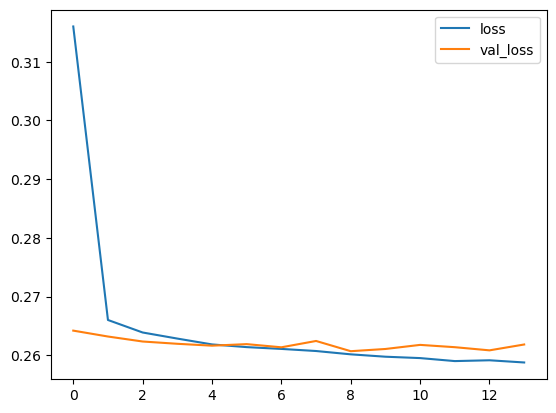

In [173]:
model_loss.plot(kind='line')

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [175]:
print(confusion_matrix(y_test,predictions))

[[ 6917  8741]
 [  130 63256]]


In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
new_customerr = scaler.transform(new_customer.values.reshape(-1,82))

In [ ]:
new_cus_pred = model.predict(new_customerr)

In [ ]:
new_cus_pred

In [ ]:
df.iloc[random_ind]['loan_repaid']

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
DTC = DecisionTreeClassifier()

In [196]:
y=df['loan_repaid']
X=df.drop('loan_repaid',axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [187]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [188]:
predictions = DTC.predict(X_test)

In [189]:
print(confusion_matrix(y_test,predictions))

[[15227 10253]
 [11905 93038]]


In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58     25480
           1       0.90      0.89      0.89    104943

    accuracy                           0.83    130423
   macro avg       0.73      0.74      0.74    130423
weighted avg       0.83      0.83      0.83    130423



In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
rfc = RandomForestClassifier(n_estimators=100)

In [193]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [199]:
predictions = rfc.predict(X_test)

In [200]:
print(confusion_matrix(y_test,predictions))

[[ 11612  13868]
 [   589 104354]]


In [201]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     25480
           1       0.88      0.99      0.94    104943

    accuracy                           0.89    130423
   macro avg       0.92      0.73      0.78    130423
weighted avg       0.90      0.89      0.87    130423

